In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 2
import sys
case=2
a=2
cost='abs'

In [3]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [4]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)

In [5]:
from sklearn.model_selection import train_test_split, KFold

In [30]:
n_splits = 10


In [31]:
num_train = int(train_ratio*len(train_max)+0.5)
train= train_max[:num_train]
train

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38])

In [32]:
test

array([0, 1, 2, 3])

In [35]:
train_ix = df.index[train]
test_ix = df.index[test]

tensor_copy = tensor.copy()
tensor_copy[test, 1:, :] = np.NaN

In [41]:
tensor_copy[3, 6, :]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

In [22]:
train_test_split(train_max)

[array([14, 10,  9,  8,  4, 30, 16, 28, 12, 20, 23, 15, 35, 38, 27, 31, 21,
        26, 22, 11, 36, 29,  6, 17,  5, 37]),
 array([ 7, 13, 32, 34, 18, 19, 33, 24, 25])]

In [33]:
from common import compute_rmse


In [34]:
np.arange(0.1, 1.0, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [236]:
pred = {}
sd = {}
out = {}
n_splits = 10
case = 2
a = 2
cost = 'abs'
for appliance in APPLIANCES_ORDER:
    pred[appliance] = {f:[] for f in range(10, 110, 10)}

kf = KFold(n_splits=n_splits)
for train_percentage in range(10, 110, 10):
    print train_percentage, "\n"
    for train_max, test in kf.split(df):
        
        num_train = int((train_percentage*len(train_max)/100)+0.5)
        train = train_max[:num_train]
        
        train_ix = df.index[train]
        test_ix = df.index[test]
        num_test = len(test_ix)
        train_test_ix = np.concatenate([test_ix, train_ix])
        df_t, dfc_t = df.ix[train_test_ix], dfc.ix[train_test_ix]
        tensor = get_tensor(df_t, dfc_t)
        tensor_copy = tensor.copy()
        # First n
        tensor_copy[:num_test, 1:, :] = np.NaN
        H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)
        HAT = multiply_case(H, A, T, case)
        print train_ix, test_ix
        for appliance in APPLIANCES_ORDER:
            pred[appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))
        

10 

Int64Index([1524, 1731, 2031], dtype='int64') Int64Index([54, 203, 527, 1450], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([1524, 1731, 2031, 2354], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([2606, 3687, 3864, 3938], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([4083, 4095, 4329, 4495], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([4761, 4934, 5909, 5938], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([6268, 6377, 6429, 6497], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([6547, 7062, 7114, 7409], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([7639, 8061, 8342, 8574], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([8733, 9213, 9370, 9585], dtype='int64')
Int64Index([54, 203, 527], dtype='int64') Int64Index([9612, 9775, 9836], dtype='int64')
20 

Int64Index([1524, 1731, 2031, 2354, 2606, 3687, 3864], d

Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 6268, 6377, 6429, 6497, 6547],
           dtype='int64') Int64Index([4761, 4934, 5909, 5938], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5909, 5938, 6547],
           dtype='int64') Int64Index([6268, 6377, 6429, 6497], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5909, 5938, 6268],
           dtype='int64') Int64Index([6547, 7062, 7114, 7409], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5909, 5938, 6268],
           dtype='int64') Int64Index([7639, 8061, 8342, 8574], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
      

Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5909, 5938, 6547, 7062,
            7114, 7409, 7639, 8061, 8342, 8574, 8733, 9213, 9370],
           dtype='int64') Int64Index([6268, 6377, 6429, 6497], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5909, 5938, 6268, 6377,
            6429, 6497, 7639, 8061, 8342, 8574, 8733, 9213, 9370],
           dtype='int64') Int64Index([6547, 7062, 7114, 7409], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5909, 5938, 6268, 6377,
            6429, 6497, 6547, 7062, 7114, 7409, 8733, 9213, 9370],
           dtype='int64') Int64Index([7639, 8061, 8342, 8574], dtype='int64')
Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4

In [77]:
np.concatenate([train_ix, test_ix]),test_ix

(array([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
        3938, 4083, 4095, 9612, 9775, 9836]),
 Int64Index([9612, 9775, 9836], dtype='int64'))

In [96]:
df['hvac_5'].dropna()

54       49.207119
1450    164.875168
1731    127.731735
2354    185.937088
2606    151.501984
3687    100.780998
3864     86.859367
3938     16.774599
4329    119.323715
4495      0.009917
4934      7.361383
5938      0.011700
6377     18.414984
6429     25.335335
6497    174.453110
6547     21.914534
7062     20.665335
7114     90.961266
7639     78.562294
8061    200.453964
8342     42.101170
8574     61.124233
8733    125.087700
9213     28.434235
9370    424.757935
9612    228.396637
9775     34.910049
Name: hvac_5, dtype: float64

In [276]:
from common import compute_rmse_fraction

In [286]:
len(compute_rmse_fraction('hvac',s[range(4, 10)],'SanDiego')[0])

181

In [287]:
len(compute_rmse('hvac',s[range(4, 10)],'SanDiego')[0])

181

In [278]:
out = {}
for appliance in APPLIANCES_ORDER[1:]:
    out[appliance] = {}
    for f in range(10, 110, 10):
        s = pd.concat(pred[appliance][f]).ix[df.index]
        if appliance=="hvac":
                out[appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
        else:   
            out[appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]

    

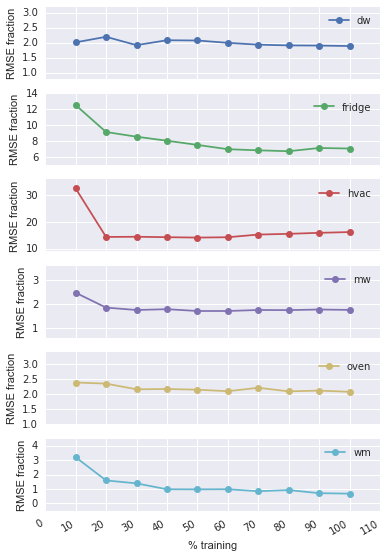

In [283]:
import seaborn
ax = pd.DataFrame(out).plot(subplots=True, figsize=(6, 10),marker='o',xlim=(0, 110))
ax[-1].set_xlabel("% training");
ax[-1].locator_params(tight=False, nbins=20, axis='x')
for a in ax:
    a.locator_params(tight=False, nbins=6, axis='y')
    yl_start, yl_end  = a.get_ylim()
    a.set_ylim((yl_start-1, yl_end+1))
    a.set_ylabel("RMSE fraction")
plt.savefig("../results/sd_error_vs_train_fraction.png", bbox_inches="tight", dpi=300)

### Investigating HVAC 




In [250]:
print df.ix[[7062,7114, 7409]][['hvac_%d' %month for month in range(1, 13)]]['hvac_9'].mean()
print df.ix[[7062,7114, 7409]]['aggregate_9'].mean()

170.939194997
613.710255941


In [253]:
print df.ix[[  54,  203,  527, 1450, 2606, 3687, 3864, 3938, 4083, 4095, 4329,
            4495, 4761, 4934, 5909, 5938, 6268, 6377, 6429, 6497, 6547, 7062,
            7114, 7409]][['hvac_%d' %month for month in range(1, 13)]]['hvac_9'].mean()
print df.ix[[  54,  203,  527, 1450, 2606, 3687, 3864, 3938, 4083, 4095, 4329,
            4495, 4761, 4934, 5909, 5938, 6268, 6377, 6429, 6497, 6547, 7062,
            7114, 7409]]['aggregate_9'].mean()

226.478356754
583.466249354


In [254]:
print df.ix[[  54,  203,  527, 1450, 2606, 3687, 3864, 3938, 4083, 4095, 4329,
            4495, 4761, 4934, 5909, 5938, 6268, 6377, 6429, 6497, 6547]][['hvac_%d' %month for month in range(1, 13)]]['hvac_9'].mean()
print df.ix[[  54,  203,  527, 1450, 2606, 3687, 3864, 3938, 4083, 4095, 4329,
            4495, 4761, 4934, 5909, 5938, 6268, 6377, 6429, 6497, 6547]]['aggregate_9'].mean()

238.379605702
576.985390799


In [257]:
238.3/576.9, 170./614, 226./583.

(0.41306985612757846, 0.2768729641693811, 0.3876500857632933)

In [261]:
o_hvac[70]['pred']['hvac_9', 1524], o_hvac[60]['pred']['hvac_9', 1524]

(1056.2111500140263, 765.95885461938815)

In [273]:
df.ix[1524][['hvac_%d' %month for month in range(1, 13)]]

hvac_1            NaN
hvac_2            NaN
hvac_3            NaN
hvac_4            NaN
hvac_5            NaN
hvac_6            NaN
hvac_7            NaN
hvac_8     546.411072
hvac_9     545.248230
hvac_10    174.709518
hvac_11      0.029933
hvac_12      0.048017
Name: 1524, dtype: float64

In [275]:
df[['hvac_%d' %month for month in range(1, 13)]].mean()

hvac_1       0.022060
hvac_2       0.019332
hvac_3       0.012495
hvac_4       9.331636
hvac_5      95.775835
hvac_6      48.930568
hvac_7     162.271624
hvac_8     206.722128
hvac_9     253.694275
hvac_10     80.929578
hvac_11      0.362117
hvac_12      0.009587
dtype: float64

In [270]:
d_60 = o_hvac[60]['de']
d_70 = o_hvac[70]['de']
(d_60-d_70).sort_values().head(20)

hvac_9   1524   -290.252295
hvac_8   1524   -281.819718
hvac_10  1524   -147.646066
hvac_9   4095    -99.291740
hvac_7   4095    -85.881662
hvac_8   4095    -84.839592
hvac_7   6497    -61.248620
hvac_9   1450    -59.373165
hvac_8   1731    -59.162399
hvac_9   1731    -53.489866
hvac_8   1450    -45.785454
hvac_9   527     -45.084668
hvac_7   3687    -44.647574
hvac_9   5938    -37.789735
hvac_10  1731    -36.526464
hvac_8   3687    -35.989307
         527     -31.895240
hvac_9   6377    -30.920029
hvac_5   6497    -29.057456
hvac_6   4095    -26.803153
dtype: float64

In [240]:
o_hvac = {}
appliance='hvac'
for f in range(10, 110, 10):
    o_hvac[f] = {}
    s = pd.concat(pred[appliance][f]).ix[df.index]
  
    o_hvac[f]['gt'], o_hvac[f]['pred'], o_hvac[f]['rmse'], o_hvac[f]['de'] = compute_rmse(appliance,s[range(4, 10)],'SanDiego')
   
    

In [241]:
g = o_hvac[70]['de'].dropna()
g.sort_values()[::-1].head(10)

hvac_9   1524    510.962920
hvac_8   1524    416.137639
hvac_5   9370    298.773457
hvac_10  1524    281.370370
hvac_7   9370    269.899178
hvac_8   9370    262.509864
hvac_9   9370    254.666259
         7062    250.265040
hvac_8   7062    218.810476
hvac_9   4095    204.807630
dtype: float64

In [242]:
g = o_hvac[60]['de'].dropna()
g.sort_values()[::-1].head(10)

hvac_5   9370    293.654326
hvac_7   9370    265.636227
hvac_9   7062    251.441520
hvac_8   9370    251.257036
hvac_9   9370    241.848914
         1524    220.710625
hvac_8   7062    219.330219
hvac_7   7062    197.587906
hvac_10  2606    156.581188
         8733    148.167044
dtype: float64

In [208]:
q = o_hvac[10]['de'].sort_values()[::-1].head(20).index


In [212]:
w = list(set(q.get_level_values(1)))

In [216]:
df.ix[w][['hvac_%d' %month for month in range(1, 13)]]

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,hvac_11,hvac_12
1731,NaN,0.000000,NaN,22.865316,127.731735,36.700634,289.619293,305.011932,390.342133,85.829231,NaN,0.000000
1450,0.025967,0.087300,0.029583,2.051800,164.875168,122.322098,296.445068,454.090759,469.634796,232.218460,NaN,NaN
9775,0.009300,0.005667,0.009600,0.010250,34.910049,0.003683,0.002467,95.954834,203.961411,0.002000,0.002783,0.003100
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.411072,545.248230,174.709518,0.029933,0.048017
7062,NaN,NaN,NaN,31.656116,20.665335,25.018316,16.174034,29.232233,21.188099,27.328350,NaN,NaN
8733,NaN,NaN,NaN,23.568417,125.087700,17.050917,234.299011,282.283966,325.911987,248.764633,NaN,NaN
8574,0.056750,0.055483,0.065600,0.059417,61.124233,0.050100,55.605553,105.723518,172.534805,43.805183,0.041517,0.033950
4095,NaN,NaN,NaN,NaN,NaN,183.728516,324.804688,371.791626,498.784088,NaN,NaN,NaN


In [223]:
o_hvac[70]['pred']['hvac_8',1524],o_hvac[70]['gt']['hvac_8',1524]

(962.54871095842998, 546.41107177734375)

In [105]:
df[['hvac_%d' %month for month in range(1, 13)]].describe()

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,hvac_11,hvac_12
count,10.000000,12.000000,16.000000,22.000000,27.000000,31.000000,33.000000,33.000000,30.000000,27.000000,16.000000,18.000000
mean,0.022060,0.019332,0.012495,9.331636,95.775835,48.930568,162.271624,206.722128,253.694275,80.929578,0.362117,0.009587
std,0.022445,0.027874,0.017968,13.668174,94.210673,61.478349,139.246034,169.534333,172.845906,77.042968,0.828227,0.014504
min,0.000050,0.000000,0.000000,0.000667,0.009917,0.000000,0.002467,0.020883,7.287033,0.001650,0.000000,0.000000
25%,0.005200,0.000113,0.000100,0.029854,23.624934,0.014633,49.461948,68.257019,121.768452,29.595809,0.000000,0.000000
50%,0.014917,0.007625,0.003342,1.547417,78.562294,17.050917,125.890953,170.590775,223.139313,53.759014,0.006550,0.001942
75%,0.033254,0.021750,0.020025,13.215179,139.616859,99.446224,289.619293,325.527496,363.180908,111.318703,0.032829,0.015396
max,0.060433,0.087300,0.065600,41.394333,424.757935,200.878555,519.166382,577.740662,625.017151,253.608154,2.561283,0.048017


In [111]:
df.ix[9370][['hvac_%d' %month for month in range(1, 13)]]

hvac_1            NaN
hvac_2            NaN
hvac_3            NaN
hvac_4            NaN
hvac_5     424.757935
hvac_6            NaN
hvac_7     519.166382
hvac_8     543.011292
hvac_9     561.690918
hvac_10           NaN
hvac_11           NaN
hvac_12           NaN
Name: 9370, dtype: float64

In [112]:
df.ix[9370][['aggregate_%d' %month for month in range(1, 13)]]

aggregate_1             NaN
aggregate_2             NaN
aggregate_3             NaN
aggregate_4      874.489319
aggregate_5      968.830872
aggregate_6      874.875244
aggregate_7     1031.642944
aggregate_8     1135.630005
aggregate_9     1228.715088
aggregate_10            NaN
aggregate_11            NaN
aggregate_12            NaN
Name: 9370, dtype: float64

In [145]:
a = df['hvac_5']
a[a<10]


4495    0.009917
4934    7.361383
5938    0.011700
Name: hvac_5, dtype: float64

In [136]:
st = pd.HDFStore('/Users/nipunbatra/all.h5', mode='r')

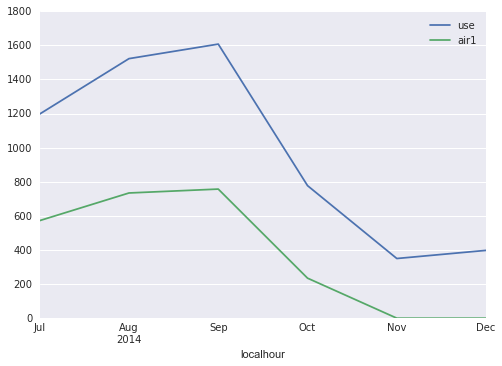

In [222]:
st['/1524']['2014'][['use','air1']].resample('1M').mean().plot()

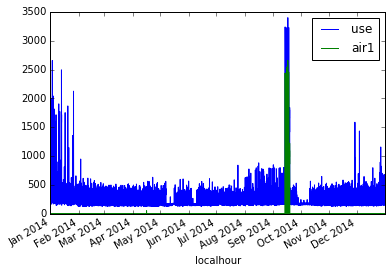

In [144]:
st['/5938']['2014'][['use','air1']].plot()

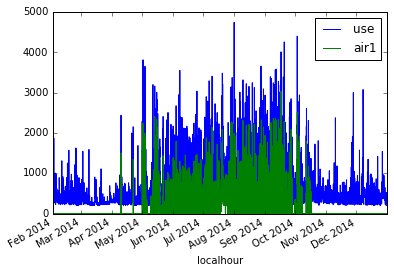

In [142]:
st['/8061']['2014'][['use','air1']].plot()

In [15]:
for appliance in APPLIANCES_ORDER:
    temp = pd.concat(pred[percentage][appliance])
   

for appliance in APPLIANCES_ORDER[1:]:

    if appliance=="hvac":
        out[percentage][appliance] = compute_rmse(appliance, pred[percentage][appliance][range(4, 10)],'SanDiego')[2]
    else:   
        out[percentage][appliance] = compute_rmse(appliance, pred[percentage][appliance],'SanDiego')[2]

    if n_splits == 2:
        continue
    
    percentage = 100 - percentage
    print percentage
    pred[percentage] = {}
    sd[percentage] = {}
    out[percentage] = {}
    print out

    for train, test in kf.split(df):
        train_ix = df.index[train]
        test_ix = df.index[test]
        tensor_copy = tensor.copy()
        tensor_copy[test, 1:, :] = np.NaN
        H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)
        HAT = multiply_case(H, A, T, case)
        for appliance in APPLIANCES_ORDER:
            if appliance not in pred[percentage]:
                pred[percentage][appliance] = []

            pred[percentage][appliance].append(pd.DataFrame(HAT[test, appliance_index[appliance], :], index=test_ix))
    
    for appliance in APPLIANCES_ORDER:
        temp = pd.concat(pred[percentage][appliance])
#         assert(len(temp)==len(df)*(n_splits-1))
        pred[percentage][appliance] = temp.groupby(temp.index).mean().ix[df.index]
        sd[percentage][appliance] = temp.groupby(temp.index).mean().ix[df.index]
    
   
    for appliance in APPLIANCES_ORDER[1:]:
        
        if appliance=="hvac":
            out[percentage][appliance] = compute_rmse(appliance, pred[percentage][appliance][range(4, 10)],'SanDiego')[2]
        else:   
            out[percentage][appliance] = compute_rmse(appliance, pred[percentage][appliance],'SanDiego')[2]

2 50


NameError: name 'case' is not defined

In [7]:
from plot_functions import *

In [27]:
c.columns[::-1]

Float64Index([         50.0, 33.3333333333,          25.0,          20.0,
              16.6666666667, 14.2857142857,          12.5, 11.1111111111,
                       10.0, 9.09090909091, 8.33333333333, 7.69230769231,
              7.14285714286],
             dtype='float64')

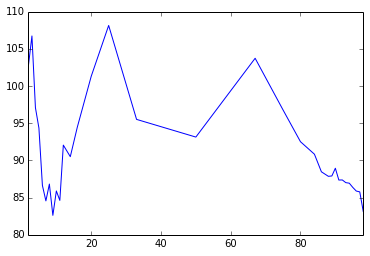

In [58]:
pd.DataFrame(out).ix['hvac'][:].plot()

In [62]:
c = pd.DataFrame(out)
# c.columns = [100.0/x for x in c.columns]
# c = c[c.columns[::-1]]

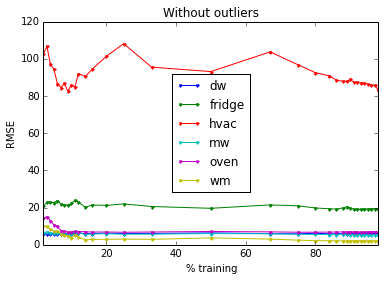

In [65]:
ax = c.T.plot(marker='.')
ax.set_xlabel("% training")
ax.set_ylabel("RMSE")
ax.set_title("Without outliers")

0 hvac
1 fridge
2 mw
3 dw
4 wm
5 oven


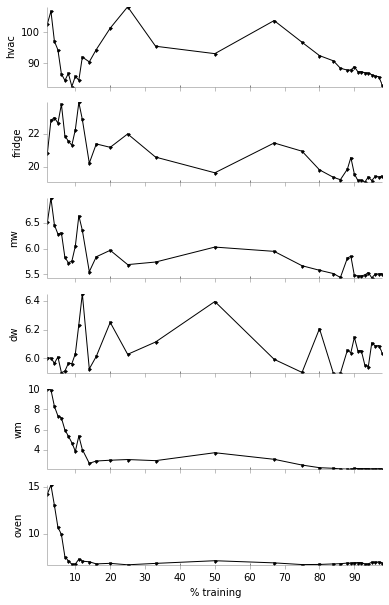

In [64]:
fig, ax = plt.subplots(nrows=6, figsize=(6, 10), sharex=True)
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
    print i, appliance
    c.T[appliance].plot(ax=ax[i], color='k', marker='.',  logx=False)
    format_axes(ax[i])
    ax[i].set_ylabel(appliance)
    ax[i].locator_params(tight=True, nbins=4, axis='y')
ax[-1].set_xlabel("% training");
ax[-1].locator_params(tight=True, nbins=10, axis='x')

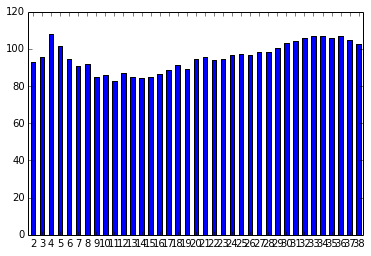

In [31]:
pd.DataFrame(out).ix['hvac'].plot(kind='bar',rot=0)


In [32]:
from common import compute_rmse_fraction, compute_rmse

In [33]:
appliance='hvac'
gtf, pf, rms, f = compute_rmse(appliance, pred[n_splits][appliance][range(4, 10)],'SanDiego')
f[f>np.percentile(f, 90)].sort_values()[::-1].head(10)

hvac_9  527     343.676079
hvac_8  1524    325.023546
hvac_9  1524    315.281314
hvac_8  527     307.109401
hvac_9  9370    270.597042
hvac_8  9370    263.785679
hvac_7  9370    256.619547
hvac_9  2606    247.074447
hvac_5  9370    239.251467
hvac_9  4095    232.697338
dtype: float64

In [34]:
def analysis(appliance, home, month):
    analysis_ser = pd.Series([gtf.ix['%s_%d' %(appliance, month),home],
                             pf.ix['%s_%d' %(appliance, month),home],
                             df.loc[home,'%s_%d' %("aggregate",month)]])
    analysis_ser.index = ['Appliance GT % of agg','Appliance Pred % of agg', 'GT (aggregate) [kWh]']
    return analysis_ser

In [35]:
analysis('hvac', 527, 8)

Appliance GT % of agg       577.740662
Appliance Pred % of agg     270.631260
GT (aggregate) [kWh]       1157.161133
dtype: float64

In [36]:
from plot_functions import *
def plot_appliances_aggregate(home, appliances=['hvac']):
    temp = {} 
    temp['aggregate'] = df.ix[home][['aggregate_%d' %month for month in range(1, 13)]].values
    for appliance in appliances:
        temp[appliance] = df.ix[home][['%s_%d' %(appliance, month) for month in range(1, 13)]].values
    temp_df = pd.DataFrame(temp, index=range(1, 13))
    temp_df.plot(color=tableau20blind[::2])
    format_axes(plt.gca())
    plt.xlabel("Month of year")
    plt.ylabel("Energy (kWh)")

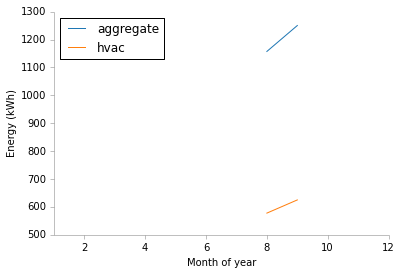

In [37]:
plot_appliances_aggregate(527)

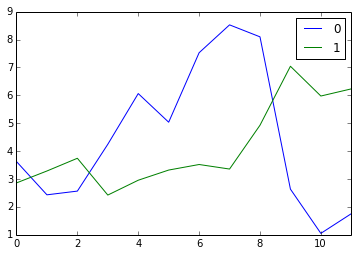

In [38]:
pd.DataFrame(T).plot()

In [39]:
pd.Series(out)

2     {u'hvac': 93.1361714301, u'wm': 3.71508807142,...
3     {u'hvac': 95.5125426166, u'wm': 2.92966579448,...
4     {u'hvac': 108.13981787, u'wm': 3.03958880383, ...
5     {u'hvac': 101.307209186, u'wm': 2.97143922342,...
6     {u'hvac': 94.449082902, u'wm': 2.89436931456, ...
7     {u'hvac': 90.5011179737, u'wm': 2.66408894617,...
8     {u'hvac': 92.056948, u'wm': 4.03260281686, u'f...
9     {u'hvac': 84.6216941206, u'wm': 5.36455143841,...
10    {u'hvac': 85.891927041, u'wm': 3.85769501997, ...
11    {u'hvac': 82.6136713464, u'wm': 4.70534850681,...
12    {u'hvac': 86.8208639193, u'wm': 5.35925088581,...
13    {u'hvac': 84.9162079474, u'wm': 6.34317019694,...
14    {u'hvac': 84.5594334456, u'wm': 5.98048654547,...
15    {u'hvac': 85.0504154033, u'wm': 6.66033268895,...
16    {u'hvac': 86.6409422115, u'wm': 7.15776199163,...
17    {u'hvac': 88.3894004223, u'wm': 7.46966745083,...
18    {u'hvac': 91.2092049495, u'wm': 7.72867852123,...
19    {u'hvac': 89.3004651898, u'wm': 7.56415007

In [40]:
pred['hvac'].describe()

KeyError: 'hvac'